# Stock price simulation

## Monte Carlo Simulation

path: s0 * e^((r - 0.5 * sig ^ 2) * delta_t + (sig * delta_t^0.5 * z)))

In [1]:
import math
import random
import matplotlib.pyplot as plt

Parameters:  
  
s0 = initial stock price  
t = time to maturity  
r = risk-less short rate  
sig = volatility of stock value  
m = the number of path nodes  
n = the number of simulations  
z = the number of lines in the graph  


#### Single Path

In [2]:
def figure_single_path(s0, t, r, sig, m):
    delta_t = t / m  # length of time interval
    path = [s0]

    for j in range(0, m):
        path.append(
            path[-1] * math.exp((r - 0.5 * sig ** 2) * delta_t + (sig * math.sqrt(delta_t) * random.gauss(0, 1))))


    plt.figure(figsize=(12, 6))
    plt.grid(True) 
    plt.xlabel('Time step')
    plt.ylabel('index level')
    plt.plot(path)    
    plt.legend()
    plt.show()


Trial:

No handles with labels found to put in legend.


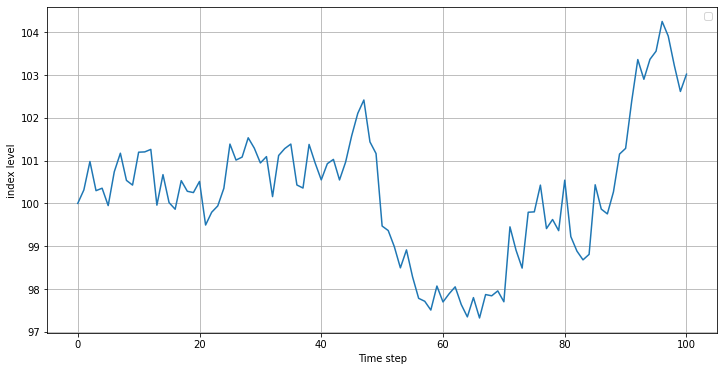

In [3]:
figure_single_path(100, 0.08, 0.03, 0.2, 100)

#### Multiple path

In [4]:
def figure_multiple_path(s0, t, r, sig, m, n, z):
    delta_t = t / m  # length of time interval
    list_path = []

    for i in range(0, n):
        path = [s0]

        for j in range(0, m):
            path.append(
                path[-1] * math.exp((r - 0.5 * sig ** 2) * delta_t + (sig * math.sqrt(delta_t) * random.gauss(0, 1))))

        list_path.append(path)

    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.xlabel('Time step')
    plt.ylabel('index level')
    plt.legend()

    for q in range(0, z):
        plt.plot(list_path[q])


Trial:

No handles with labels found to put in legend.


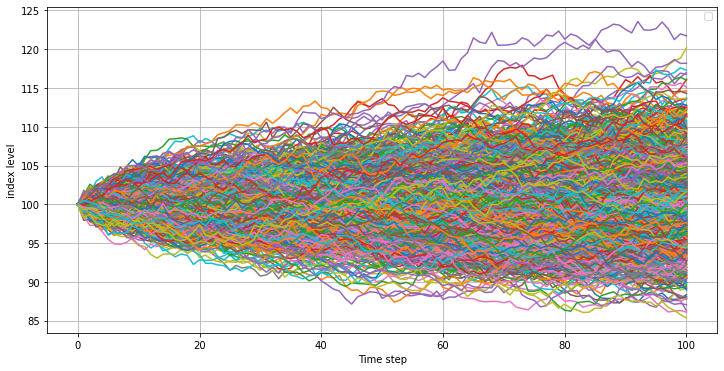

In [5]:
figure_multiple_path(100, 0.08, 0.03, 0.2, 100, 1000, 1000)
plt.show()

## Jump Diffusion

Merton(1976)

In [6]:
from math import exp, sqrt
import random
import matplotlib.pyplot as plt
import numpy as np

Parameters:  
  
s0 = initial stock price  
t = time to maturity  
r = risk-less short rate  
sig = volatility of stock value  
m = the number of path nodes  
n = the number of simulations  
lambda = Jump density  
mu = Expected jump law  
std = standard deviation of jump rule  


#### Single Path

In [7]:
def single_path_jump(s0, dt, r, sig, m, lam, mu, std):
    delta_t = dt / m  # length of time interval
    rj = lam * (exp(mu + 0.5 * std ** 2) - 1)
    poi = np.random.poisson(lam * delta_t, m)

    path = [s0]
    for j in range(0, m):
        path.append(
            path[-1] * exp((r - rj - 0.5 * sig ** 2) * delta_t + (sig * sqrt(delta_t) * random.gauss(0, 1))) + (exp(
                mu + std * random.gauss(0, 1)) - 1) * poi[j])

    return path

Trial

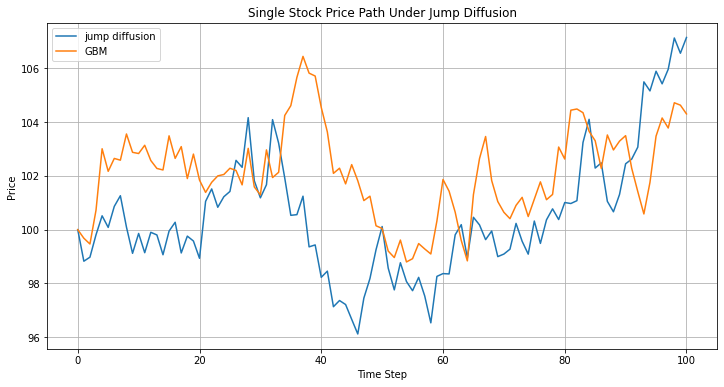

In [8]:
jump = single_path_jump(100, 0.08, 0.03, 0.3, 100, 0.4, -0.8, 0.1)
GBM = single_path_jump(100, 0.08, 0.03, 0.3, 100, 0, -0.8, 0.1)

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.title('Single Stock Price Path Under Jump Diffusion')

plt.plot(jump, label='jump diffusion')
plt.plot(GBM, label="GBM")

plt.legend()
plt.show()


#### Multiple Path

In [9]:
def multiple_path_jump(s0, dt, r, sig, m, n, lam, mu, std):

    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.xlabel('Time Step')
    plt.ylabel('Price')
    plt.title('Multiple Stock Price Path Under Jump Diffusion')

    for i in range(0, n):
        a = single_path_jump(s0, dt, r, sig, m, lam, mu, std)
        plt.plot(a)

    plt.legend()
    plt.show()

Trial

No handles with labels found to put in legend.


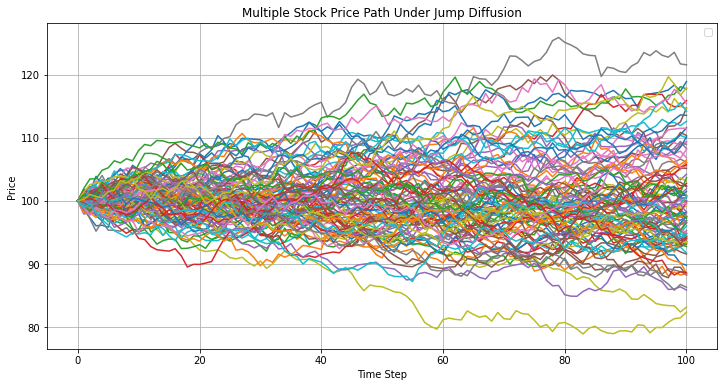

In [10]:
jump_m = multiple_path_jump(100, 0.08, 0.03, 0.3, 100, 100, 0.4, -0.8, 0.1)